## Image Enhancement**
Author: Dayne N. Fradejas

In [1]:
# header files
import cv2
import numpy as np

# print version of cv2
print(cv2.__version__)

4.7.0


In [2]:
# (a.) Select a negative floating-number. Take the absolute value, round it, and then take its ceiling and floor. 

x = -3.14159

print("random float = ",x) 
print("abs(x) = ", abs(x))  # absolute value
print("round(x) = ", round(x))  # round to nearest integer
print("ceil(x) = ", np.ceil(x))  # round up
print("floor(x) = ", np.floor(x))  # round down")

random float =  -3.14159
abs(x) =  3.14159
round(x) =  -3
ceil(x) =  -3.0
floor(x) =  -4.0


In [3]:
# (b.) generate 3x4 matrix with random integers using opencv
matrix = cv2.UMat(3, 3, cv2.CV_32SC1)
cv2.randu(matrix, 0, 255)
print(matrix.get())

[[ 91   2  79]
 [179  52 205]
 [236   8 181]]


In [4]:
# (C) Declare matrix variables A and B and integer variable c within OpenCV.

A = cv2.UMat(np.array([[[6, 0, 2], [1, 6, 4], [3, 5, 9]],
                       [[2, 6, 5], [5, 4, 9], [5, 3, 7]],
                       [[9, 7, 1], [6, 9, 2], [8, 3, 3]]], dtype=np.float32))
B = cv2.UMat(np.array([[[9, 1, 9], [9, 2, 3], [7, 2, 6]],
                       [[7, 0, 5], [4, 3, 6], [0, 3, 8]],
                       [[2, 0, 3], [0, 2, 9], [4, 2, 1]]], dtype=np.float32))

c = 0.7
d = 0.55

print(A.get().shape)

(3, 3, 3)


In [5]:
# Compute the following 
# (i) cA + (1 - c)B + d
result = cv2.UMat(c*A.get() + (1-c)*B.get() + d)
print(result.get())

[[[7.45      0.85      4.65     ]
  [3.95      5.35      4.25     ]
  [4.75      4.65      8.65     ]]

 [[4.05      4.75      5.55     ]
  [5.25      4.25      8.65     ]
  [4.05      3.55      7.8500004]]

 [[7.45      5.4500003 2.15     ]
  [4.75      7.45      4.65     ]
  [7.3500004 3.2499998 2.9499998]]]


In [6]:
# Initialize lists to store the SVD components
A_inv = []

def diag_indices(n):
    rows = range(n)
    return rows, rows

# Invert each 2D matrix using SVD
for i in range(A.get().shape[0]):
    w, u, vt = cv2.SVDecomp(A.get()[i])
    # Invert the singular values
    w_inv = cv2.Mat(np.zeros((u.shape[0], vt.shape[0]))).T
    w_inv[diag_indices(min(u.shape[0], vt.shape[0]))] = 1 / w.flatten()

    # Reconstruct the inverse
    A_inv.append(cv2.UMat(vt.T @ w_inv @ u.T)) 


# Convert list of UMats to list of numpy arrays
A_inv = [ai.get() for ai in A_inv]


print("A_inv =")
for i in range(len(A_inv)):
    print(A_inv[i])
    print("")

A_inv =
[[ 0.19101122  0.05617978 -0.06741571]
 [ 0.01685395  0.26966289 -0.12359547]
 [-0.07303371 -0.1685393   0.20224714]]

[[ 0.02702706 -0.72973017  0.91891921]
 [ 0.27027027 -0.29729744  0.1891893 ]
 [-0.13513516  0.64864898 -0.59459481]]

[[ 0.17355371 -0.14876034  0.04132233]
 [-0.01652893  0.15702481 -0.09917357]
 [-0.44628095  0.23966943  0.32231401]]



In [7]:
# calculate the eigen values of B
print(f"Eigen value for matrix:")
for i in range(B.get().shape[0]):
    eigenvalues, eigenvectors = cv2.eigenNonSymmetric(B.get()[i])
    
    # Output the first 3 eigenvalues
    print(np.sort(eigenvalues.flatten()[:3]))

Eigen value for matrix:
[ 0.07765487  0.07765487 16.84469   ]
[ 2.         4.3944488 11.605552 ]
[-4.  2.  7.]


In [8]:
# solve the matrix equation Ax = b 
A = cv2.UMat(np.array([[[6, 0, 2], [1, 6, 4], [3, 5, 9]],
                       [[2, 6, 5], [5, 4, 9], [5, 3, 7]],
                       [[9, 7, 1], [6, 9, 2], [8, 3, 3]]], dtype=np.float32))


b = cv2.UMat(np.array([[3, 5, 5], [7, 2, 8], [4, 1, 6]],dtype=np.float32))


# Iterate the matrix to be a 2D matrix
print("x = ")
for i in range(A.get().shape[0]):
    _, x = cv2.solve(A.get()[i], b.get(), flags=cv2.DECOMP_QR)
    print(" ", x[1])


x = 
  [1.4438201 0.5       1.5      ]
  [-0.5135139   0.9459458   0.10810816]
  [0.65289253 0.13223144 0.5785124 ]


In [2]:
import cv2
import numpy as np

# (d) create a 2D matrix with three channels of type byte and size 100 by 100 and set all values to zero
matrix = cv2.UMat(np.zeros((100, 100, 3), dtype=np.uint8))

# Draw a red rectangle between with corners (30,10) and (60,40). Display the image
cv2.rectangle(matrix, (30, 10), (60, 40), (0, 0, 255), -1)
cv2.imshow("Rectangle", matrix)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [10]:
# extract the red channel from matrix in (d)
red_channel = matrix.get()[:, :, 2]

# create a grayscale image from the red channel
gray_image = cv2.cvtColor(red_channel, cv2.COLOR_GRAY2BGR)

# display the grayscale image
cv2.imshow("Grayscale Image", gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


2. Reads and displays a video and is controlled by a slider and button. The slider controls the position
within the video from start to end in 10 increments and the button controls pause/unpause. Label them
both. The program will prompt the user to type in the filename of the video.

In [3]:
import cv2

filename = input("Enter filename of video: ")
if ".mp4" not in filename:
    filename += ".mp4"

cap = cv2.VideoCapture(filename)
cv2.namedWindow("Video")

frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cv2.createTrackbar("Position", "Video", 0, frame_count, lambda x: cap.set(cv2.CAP_PROP_POS_FRAMES, x))

if not cap.isOpened():
    print("Error opening video file")
    exit()

cv2.moveWindow("Video", 500, 200)

# Add a pause variable
pause = False

while True:
    # Only read a new frame if the video is not paused
    if not pause:
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, (640, 360))
            cv2.imshow("Video", frame)
            cv2.setTrackbarPos("Position", "Video", int(cap.get(cv2.CAP_PROP_POS_FRAMES))+10)
        else:
            print("Cannot read frame")
            break

    # Check for key presses
    key = cv2.waitKey(25) & 0xFF

    # If the 'q' key is pressed, break from the loop
    if key == ord('q'):
        break
    # If the space bar key is pressed, toggle the pause variable
    elif key == ord(' '):
        pause = not pause

cap.release()
cv2.destroyAllWindows()

Error opening video file
Cannot read frame


: 

3. Write code that reads in and displays an image. When the user clicks on the image, display the mouse
pointer coordinates and the corresponding pixel (blue, green, red) values and write those values as text to
the screen at the mouse location.

In [1]:
import cv2

# Initialize variables to store the mouse coordinates and pixel values
mouse_x, mouse_y = -1, -1
pixel_value = (0, 0, 0)  # Initialize with default pixel value

# Mouse callback function
def get_pixel_value(event, x, y, flags, param):
    global mouse_x, mouse_y, pixel_value

    if event == cv2.EVENT_LBUTTONDOWN:
        mouse_x, mouse_y = x, y
        pixel_value = img[y, x]  # Get the pixel value at the clicked location

# add image directory
filename = 'cells27.jpg'

# Load the image
img = cv2.imread(filename)

# Create a window and set the mouse callback function
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', get_pixel_value)

while True:
    # Create a copy of the image to display the text
    img_with_text = img.copy()

    # Display the mouse coordinates and pixel value as text
    text = f'Pos:({mouse_x}, {mouse_y}) - BGR: ({pixel_value[0]}, {pixel_value[1]}, {pixel_value[2]})'
    cv2.putText(img_with_text, text, (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Show the image with the text
    cv2.imshow('Image', img_with_text)

    # Wait for a key press and exit if the user presses 'q'
    key = cv2.waitKey(1)
    if key == ord('q'):
        break

# Close all OpenCV windows
cv2.destroyAllWindows()


4. Write code that continuously reads frames from your webcam, turns the result to grayscale, and performs
Canny edge detection on the image. Display all three stages of processing as three different images in
one window. (Hint: create another image of the same height but three times the width as the video frame.
Copy the images into this by creating three new image headers that point to the beginning of and to
one-third and two-thirds of the way into the image data.)

In [2]:
import cv2

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Check if the webcam opened successfully
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Create a resizable window
cv2.namedWindow('Webcam Processing', cv2.WINDOW_NORMAL)

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()
    
    if not ret:
        print("Error: Could not read a frame from the webcam.")
        break
    
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Perform Canny edge detection
    edges = cv2.Canny(gray, 100, 200)

    # Create an image to display all three stages
    height, width = frame.shape[:2]
    combined_frame = frame.copy()
    combined_frame = cv2.resize(combined_frame, (3 * width, height))

    # Place the original frame, grayscale frame, and edges in the combined frame
    combined_frame[:, :width] = frame
    combined_frame[:, width:2*width] = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    combined_frame[:, 2*width:] = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Display the combined frame with all three stages
    cv2.imshow('Webcam Processing', combined_frame)

    # Resize the window to fit the screen
    cv2.resizeWindow('Webcam Processing', 1080, 720)

    # Exit the loop when the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


**Image Enhancement**
Write a code that performs image enhancement on the following images using spatial domain operators we leared in class:
<ol>
    <li> dental.gif
    <li> cells27.jpg
    <li> butterfly.gif
    <li> nomandkids.jpg
</ol>

Image enhancement for dental.gif

In [1]:
import cv2
import matplotlib.pyplot as plt

filename = "dental.gif"
cap = cv2.VideoCapture(filename)

while True:
    ret, frame = cap.read()

    # If frame is not read correctly, reset the frame counter
    if not ret:
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
    else:

        # apply laplacian to frame
        img_laplacian= cv2.Laplacian(frame, cv2.CV_8U)

        # subtract laplacian to original image
        img = cv2.subtract(frame, img_laplacian)

        # apply sobel image to img
        img_sobel = cv2.Sobel(img, cv2.CV_8U, 2, 2, ksize=1)
        
        # subtract sobel image from img
        img_enhanced = cv2.subtract(img, img_sobel)

        # display frame and img_enhanced in top of each other
        cv2.imshow("Image", cv2.vconcat([frame, img_enhanced]))
 
    # Press 'q' to exit
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
# show image using matplotlib
cv2.destroyAllWindows()




Image enhancement for cells27.jpg

In [266]:
import cv2
import numpy as np

filename = "cells27.jpg"

# Load the image
img = cv2.imread(filename)

# Create a sharpening kernel
kernel = np.array([[0, -1, 0], 
                   [-1, 5, -1], 
                   [0, -1, 0]])

# Apply High Boost Filter Masks
img_sharp = cv2.filter2D(img, -1, kernel)

# Apply power law transformation with gamma = 1.5
gamma = 1.5
img_power_law = np.power(img_sharp / 255.0, gamma)
img_enhanced = np.uint8(img_power_law * 255)

# display img and img_enhanced side by side
img = cv2.resize(img, (400, 400))
img_enhanced = cv2.resize(img_enhanced, (400, 400))
combined = cv2.hconcat([img, img_enhanced])

# Display the image
cv2.imshow("Image", combined)
cv2.waitKey(0)
cv2.destroyAllWindows()

Image enhancement for butterfly.gif

In [267]:
import cv2

filename = "butterfly.gif"
cap = cv2.VideoCapture(filename)

while True:
    ret, frame = cap.read()

    # If frame is not read correctly, reset the frame counter
    if not ret:
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
    else:
        # convert image to grayscale
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)    

         # apply median filter to reduce noise
        img_median = cv2.medianBlur(img, 3)

        # apply historgram equalization to frame
        img_histogram = cv2.equalizeHist(img_median)

        # apply power law transformation
        gamma = 1.0
        img_power_law = np.power(img_histogram / 255.0 , gamma)
        img_enhanced  = np.uint8(img_power_law * 255)

        # display frame and img_enhanced in top of each other
        cv2.imshow("Image", cv2.hconcat([img, img_enhanced]))
    
    # Press 'q' to exit
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Image enhancement for momandkids.jpg

In [268]:
import cv2
import numpy as np

filename = "momandkids.jpg"

# Load the image
img = cv2.imread(filename)

# apply median filter on a salt and pepper image noise
img_median = cv2.medianBlur(img, 3)

# Create a sharpening kernel
kernel = np.array([[0, -1, 0], 
                   [-1, 5, -1], 
                   [0, -1, 0]])

# Apply High Boost Filter Masks
img_sharp = cv2.filter2D(img_median, -1, kernel)

# Apply power law transformation with gamma = 1.3
gamma = 1.3
img_power_law = np.power(img_sharp / 255.0, gamma)
img_enhanced = np.uint8(img_power_law * 255)



# display img and img_enhanced side by side
img = cv2.resize(img, (400, 400))
img_enhanced = cv2.resize(img_enhanced, (400, 400))
combined = cv2.hconcat([img, img_enhanced])

# Display the image
cv2.imshow("Image", combined)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Unsharp Masking in the Spatial Domain**
<p>Unsharp masking consists of blurring the original image and subtracting the blurred image from the
original. We call the difference image as the ”mask”. The mask (or a fraction of it) is then added to the
original</p>

<p>What do you see that are not seen in the original ? Are
they really there or are they artifacts of the process ? Explain</p>

In [269]:
import cv2
import numpy as np

filename = "building.tif"

# Load the image
img = cv2.imread(filename)  # -1 means load image as is, including alpha channel if it exists

# apply blur to image
img_blur = cv2.blur(img, (5,5))

# subtract blurred image from original image
img_subtract= cv2.subtract(img, img_blur)

# add the img_subtract to the img
img_enhanced = cv2.add(img, img_subtract)

# compute original and enhanced image
combined = cv2.hconcat([img, img_enhanced])

# Display the image
cv2.imshow("Image", combined)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Translation and Rotation Properties of the 2D Fourier Transform**

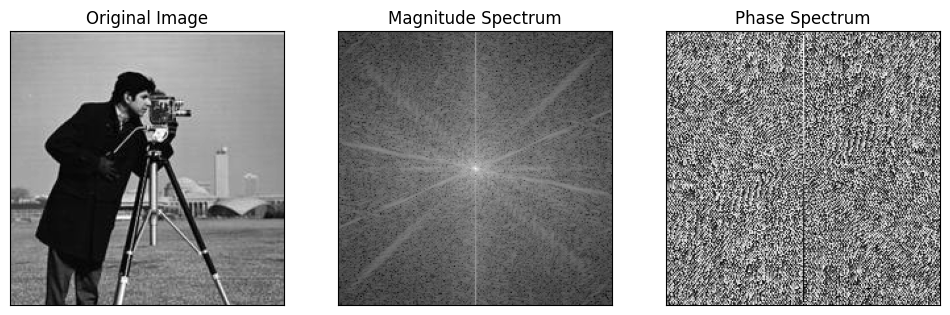

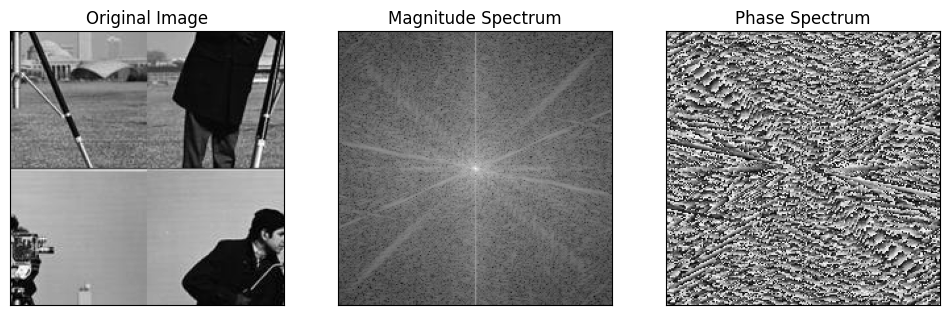

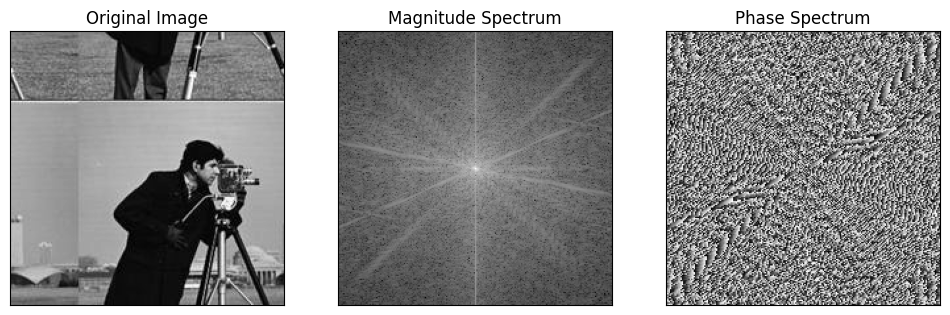

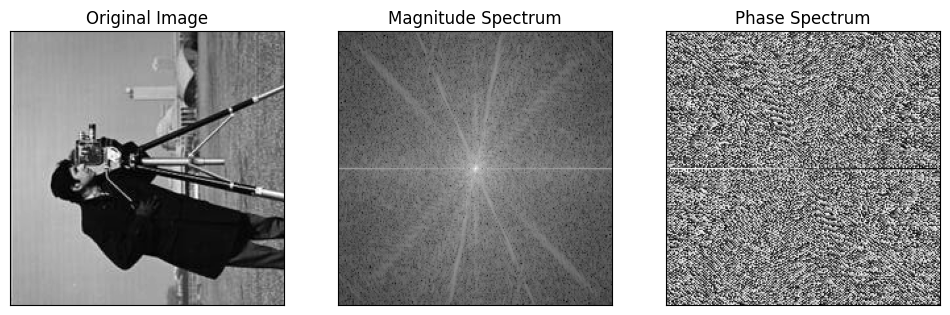

In [270]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
import cv2
import numpy as np
from matplotlib import pyplot as plt

# List of image names
images = ['cameraman1.jpg', 'cameraman2.jpg', 'cameraman3.jpg', 'cameraman4.jpg']

for image_name in images:
    # Load the image
    image = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)

    # Apply Fourier Transform
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Calculate magnitude and phase
    magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted) + 1)
    phase_spectrum = np.angle(f_transform_shifted)

    # Display the original image
    plt.figure(figsize=(12, 12))
    plt.subplot(131), plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    # Display the magnitude spectrum
    plt.subplot(132), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    # Display the phase spectrum
    plt.subplot(133), plt.imshow(phase_spectrum, cmap='gray')
    plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])

    plt.show()


